In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats
import scipy.optimize

from IPython.display import display

In [18]:
path = 'hcn4-Distance-Result-20210324.csv' # this is generated with aicsMyocyteDistToVasc.py
df = pd.read_csv(path, header=0)

display(df.head())
display(df.tail())


,Unnamed: 0,path,SAN,headMidTail,numPixels,numberOfNonNan,min,max,mean,std,sem,median
0,0,/media/cudmore/data/san-density/SAN1/SAN1_head...,SAN1,head,19894671,13420096,0.397748,25.360222,3.188754,2.342824,0.000640,2.617922
1,1,/media/cudmore/data/san-density/SAN1/SAN1_mid/...,SAN1,mid,15417610,13168884,0.397748,45.182449,6.956513,5.759775,0.001587,5.524096
2,2,/media/cudmore/data/san-density/SAN1/SAN1_tail...,SAN1,tail,10524722,7935765,0.397748,26.749126,4.776372,3.718728,0.001320,3.935267
3,3,/media/cudmore/data/san-density/SAN2/SAN2_head...,SAN2,head,36806702,25432771,0.397748,49.053249,3.997901,4.188364,0.000831,2.707051
4,4,/media/cudmore/data/san-density/SAN2/SAN2_mid/...,SAN2,mid,17588519,13169392,0.397748,36.622448,4.208601,3.606660,0.000994,3.238261


,Unnamed: 0,path,SAN,headMidTail,numPixels,numberOfNonNan,min,max,mean,std,sem,median
21,21,/media/cudmore/data/san-density/SAN7/SAN7_tail...,SAN7,tail,5301548,4428297,0.397748,23.818804,4.521518,3.215806,0.001528,3.898738
22,22,/media/cudmore/data/san-density/SAN7/SAN7_tail...,NaN,NaN,2535691,2024068,0.397748,26.272186,4.074383,3.297907,0.002318,3.238164
23,23,/media/cudmore/data/san-density/SAN8/SAN8_head...,SAN8,head,17000940,9989705,0.397748,55.748550,6.742849,11.570426,0.003661,2.152397
24,24,/media/cudmore/data/san-density/SAN8/SAN8_mid/...,SAN8,mid,15976239,10498681,0.397748,37.387466,5.983029,7.029577,0.002170,2.958370
25,25,/media/cudmore/data/san-density/SAN8/SAN8_tail...,SAN8,tail,12755843,8924827,0.397748,30.605001,5.507214,7.051496,0.002360,2.984989


,san,marker,superior,inferior
0,SAN1,o,2.617922,3.935267
1,SAN2,^,2.707051,4.318610
2,SAN3,s,3.003515,8.017469
3,SAN4,d,2.677422,4.971847
4,SAN7,<,2.077446,3.898738
5,SAN8,v,2.152397,2.984989


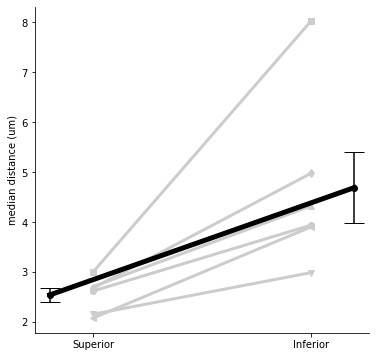

In [51]:
statCol = 'median'
sanList = df['SAN'].unique() # THIS WILL HAVE nan BECAUSE OF SAN7
regionList = ['head', 'tail']
hmtListLabel = ['Superior', 'Inferior']
goodSanList = []
dataList = []
superiorList = []
inferiorList = []
for sanStr in sanList:
    if isinstance(sanStr, float) or sanStr==np.nan or sanStr == 'nan':
        # this if is a HUGE pain in the ass
        continue
    #dfSan = df[ df['SAN']==sanStr ]
    oneList = df[ (df['SAN']==sanStr) & df['headMidTail'].isin(regionList) ][statCol].tolist()
    #print('sanStr:',  sanStr, type(sanStr), 'oneList:', oneList)
    dataList.append(oneList)
    superiorList.append(oneList[0])
    inferiorList.append(oneList[1])
    goodSanList.append(sanStr)
    
colorChars = ["0.8"] * len(sanList)
sanMarkers = ['o', '^', 's', 'd', '<', 'v']

dfOut = pd.DataFrame()
dfOut['san'] = goodSanList
dfOut['marker'] = sanMarkers
dfOut['superior'] = superiorList
dfOut['inferior'] = inferiorList
display(dfOut)

# plot
fig,ax = plt.subplots(1, figsize=(6,6)) # need constrained_layout=True to see axes titles

for idx, data in enumerate(dataList):
    colorChar = colorChars[idx]
    marker = sanMarkers[idx]
    #ax.plot(hmtList, data, colorChar)
    ax.plot(data, color=colorChar,
            linewidth=3, markersize=6, marker=marker)

# mean +/- sem
supMean = dfOut['superior'].mean()
supSem = dfOut['superior'].sem()
infMean = dfOut['inferior'].mean()
infSem = dfOut['inferior'].sem()

xMeanPlot = [-0.2, +1.2]
ax.plot(xMeanPlot, [supMean, infMean], 'o-k', linewidth=5)
ax.errorbar(xMeanPlot, y=[supMean, infMean], yerr=[supSem, infSem], 
            fmt='none',
            ecolor='k',
            capsize=10,
            zorder=3)

#ax.set_xlabel('Region')
ax.set_ylabel(f'{statCol} distance (um)')
plt.xticks([0,1], hmtListLabel)
sns.despine()

#
# run stats
